<a href="https://colab.research.google.com/github/Andrew-Negrut/MachineLearning/blob/main/LocallyWeightedLinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [171]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [172]:
from sklearn.datasets import make_regression

In [173]:
# We want to predict the output for data that is nonlinear.
# We'll apply locally weighted linear regression.
# This is a non-parametric learning algorithm, so we have to reference our
# training data every time we want to make a prediction.

In [174]:
# hypothesis
def h_theta(theta, x):
  return np.dot(theta, x)

In [175]:
# x_i is a row vector from x, so we need only the second element, given that x_inp is a number
def weight(x_i, x_inp, tau):
  return math.exp(-1 * ((x_i[1] - x_inp) ** 2) / (2 * (tau ** 2)))

In [176]:
def cost(theta, x, y, x_inp, tau, m):
  res = 0
  for i in range(m):
    res += weight(x[i], x_inp, tau) * ((h_theta(theta, x[i]) - y[i]) ** 2)

  return res

In [177]:
def g_descent(theta, x, y, x_inp, m, n, alpha, tau):
  for trial in range(2000):
    for i in range(m):
      theta_new = np.zeros(n)

      for j in range(n):
        theta_new[j] = theta[j] - alpha * x[i, j] * (h_theta(theta, x[i, :]) - y[i]) * 2 * weight(x[i], x_inp, tau)

      theta = theta_new.copy()

    print("Trial ", trial, " cost: ", cost(theta, x, y, x_inp, tau, m))


  return theta

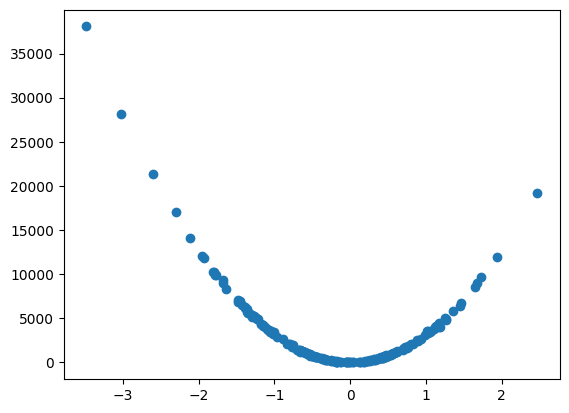

In [178]:
# Generate larger dataset
x, y = make_regression(n_samples=200, n_features=1, noise=1)
y = y ** 2
plt.scatter(x, y)
plt.show()

# make nonlinear data

In [179]:
# adding in x_0 = 1

x = np.hstack((np.ones((x.shape[0], 1)), x))

In [180]:
theta = np.zeros(x.shape[1])

In [ ]:
# big tau -> looser fit, focused on many points
# small tau -> tight fit, focused only on a few points
theta_final = g_descent(theta, x, y, 1, x.shape[0], x.shape[1], 0.001, 0.5)
theta_final

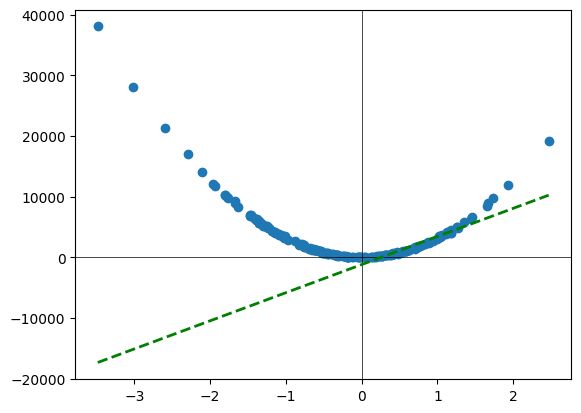

In [182]:
plt.scatter(x[:, 1], y)

plt.axhline(0, color='black', linewidth=.5)
plt.axvline(0, color='black', linewidth=.5)

x1_inp = np.linspace(min(x[:, 1]), max(x[:, 1]))
plt.plot(x1_inp, theta_final[0] + theta_final[1] * x1_inp, linestyle="dashed", linewidth=2, color='g')
plt.show()